In [3]:
import os
os.getcwd()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from pylab import rcParams

rcParams['figure.figsize'] = 4,2.5

In [4]:
data = pd.read_csv('train (1).csv')
print(data.head(10))
data_test = pd.read_csv('test (1).csv')
print(data_test.shape)

   id  accommodates                                          amenities  \
0   0             6  {TV,"Wireless Internet",Kitchen,"Free parking ...   
1   1             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
2   2             2  {TV,Internet,"Wireless Internet",Kitchen,"Indo...   
3   3             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
4   4             2  {TV,Internet,"Wireless Internet","Air conditio...   
5   5             2  {"Wireless Internet","Air conditioning",Kitche...   
6   6             2  {Internet,"Wireless Internet",Kitchen,"Free pa...   
7   7             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
8   8             2  {"Wireless Internet","Air conditioning","Pets ...   
9   9             2  {"Wireless Internet","Air conditioning",Heatin...   

   bathrooms       bed_type  bedrooms  beds cancellation_policy city  \
0        2.0       Real Bed       1.0   4.0            flexible   LA   
1        1.0       Real Bed       1.0   1

In [7]:
# 相関分析
print(data.corr())

# データ表示
print(data['city'].unique())

                            id  accommodates  bathrooms  bedrooms      beds  \
id                    1.000000      0.005027   0.005182  0.002463  0.005736   
accommodates          0.005027      1.000000   0.502278  0.708510  0.806654   
bathrooms             0.005182      0.502278   1.000000  0.586366  0.524847   
bedrooms              0.002463      0.708510   0.586366  1.000000  0.708230   
beds                  0.005736      0.806654   0.524847  0.708230  1.000000   
latitude             -0.007358     -0.079395  -0.135427 -0.057502 -0.080307   
longitude            -0.005771     -0.086365  -0.132046 -0.074027 -0.082434   
number_of_reviews     0.004658      0.042320  -0.040262 -0.033761  0.030914   
review_scores_rating  0.002307     -0.017824   0.006698  0.009996 -0.027839   
y                    -0.001129      0.522330   0.456044  0.495830  0.435603   

                      latitude  longitude  number_of_reviews  \
id                   -0.007358  -0.005771           0.004658   
ac

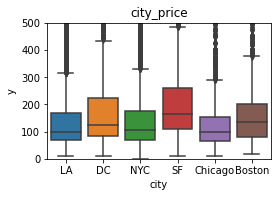

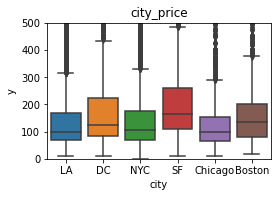

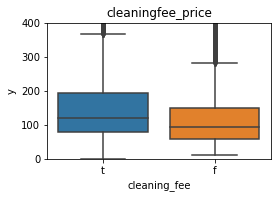

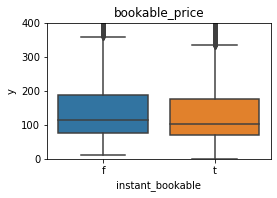

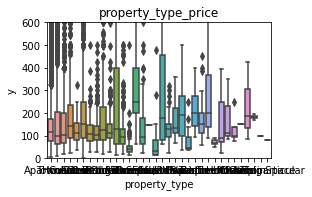

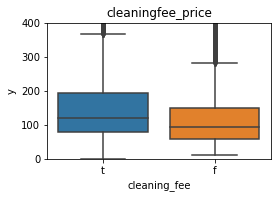

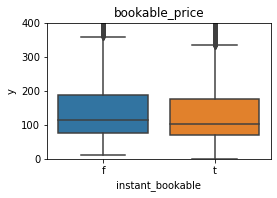

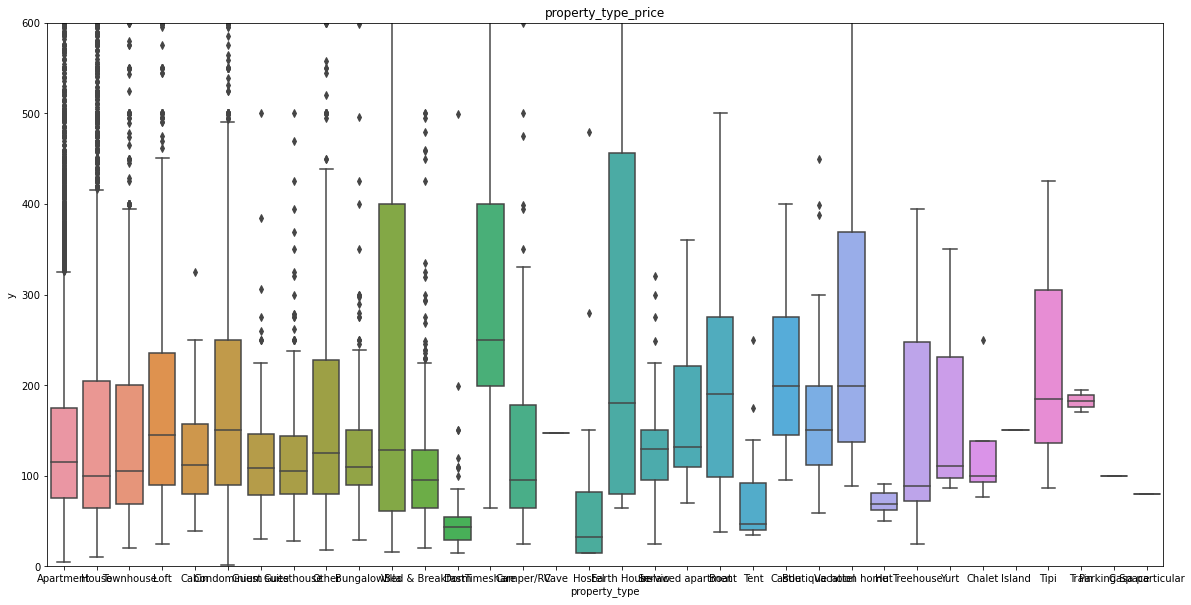

['Apartment' 'House' 'Townhouse' 'Loft' 'Cabin' 'Condominium'
 'Guest suite' 'Guesthouse' 'Other' 'Bungalow' 'Villa' 'Bed & Breakfast'
 'Dorm' 'Timeshare' 'Camper/RV' 'Cave' 'Hostel' 'Earth House' 'In-law'
 'Serviced apartment' 'Boat' 'Tent' 'Castle' 'Boutique hotel'
 'Vacation home' 'Hut' 'Treehouse' 'Yurt' 'Chalet' 'Island' 'Tipi' 'Train'
 'Parking Space' 'Casa particular']


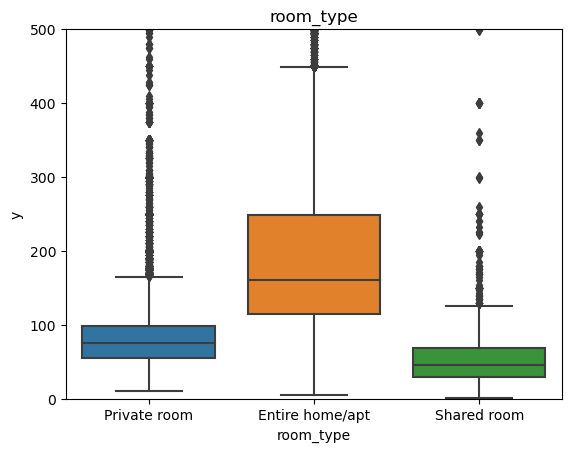

NameError: name 'select_columns' is not defined

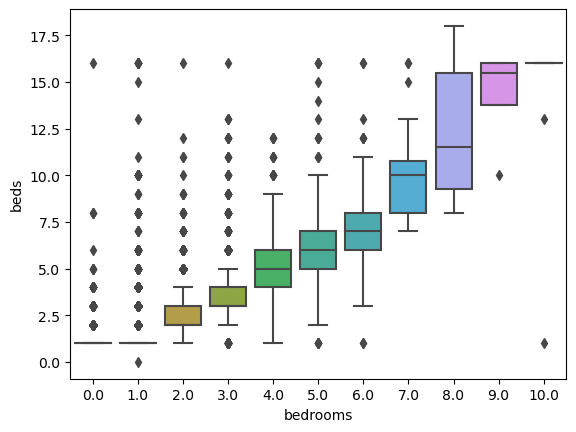

In [8]:
# 画像の大きさ初期化
rcParams['figure.figsize'] = 4,2.5

# 相関あり
sns.boxplot(data=data,x='city',y='y')
plt.title(label='city_price')
plt.ylim(0,500)
plt.show()
# 相関あり
sns.boxplot(data=data,x='city',y='y')
plt.title(label='city_price')
plt.ylim(0,500)
plt.show()
# 相関あり
sns.boxplot(data=data,x='cleaning_fee',y='y')
plt.title(label='cleaningfee_price')
plt.ylim(0,400)
plt.show()
# 相関あり
sns.boxplot(data=data,x='instant_bookable',y='y')
plt.title(label='bookable_price')
plt.ylim(0,400)
plt.show()
# 相関あり
sns.boxplot(data=data,x='property_type',y='y')
plt.title(label='property_type_price')
plt.ylim(0,600)
plt.show()
# 相関あり
sns.boxplot(data=data,x='cleaning_fee',y='y')
plt.title(label='cleaningfee_price')
plt.ylim(0,400)
plt.show()
# 相関あり
sns.boxplot(data=data,x='instant_bookable',y='y')
plt.title(label='bookable_price')
plt.ylim(0,400)
plt.show()

rcParams['figure.figsize'] = 20,10
# 相関なし？一部に偏りはある。加工をどうすれば？
sns.boxplot(data=data,x='property_type',y='y')
plt.title(label='property_type_price')
plt.ylim(0,600)
plt.show()
print(data['property_type'].unique())
plt.rcParams.update(plt.rcParamsDefault)
# 相関あり
sns.boxplot(data=data,x='room_type',y='y')
plt.title(label='room_type')
plt.ylim(0,500)
plt.show()

# ベッドルームの異常な数のデータはないか？
sns.boxplot(data=data,x='bedrooms',y='beds')
data[(data['bedrooms']==0.0) & (data['beds']>15.0)]

# 欠損値はあるのか？
print(data[select_columns].isnull().sum())
# data.dropna(how='all')
# print(data[select_columns].isnull().sum())
data[data['bathrooms'].isna()]

In [ ]:
# 相関のある説明変数
def data_remake(df):
    select_columns = ['accommodates','bathrooms','bedrooms','beds',"city","cleaning_fee","instant_bookable","room_type"]

    # NaNの処理
    data_selects_fillna = df[select_columns].fillna(0)

    # ダミー変数化
    select_dummy_columns = ["city","cleaning_fee","instant_bookable","room_type"]
    data_selects_dummy = pd.get_dummies(data_selects_fillna, columns=select_dummy_columns,drop_first=True)
    return data_selects_dummy

# print(data_remake(data).head(10))
# print(data_remake(data_test).head(10))

# テストデータ分割
train_X,test_X,train_y,test_y = train_test_split(data_selects_dummy,data['y'])
# print(train_X.head(10))

In [ ]:
# モデルの作成
model = LinearRegression()
model.fit(train_X,train_y)
pred_y = model.predict(train_X)
print(pred_y)

In [ ]:
# モデルの評価
print(np.sqrt(mean_squared_error(pred_y, train_y)))

# テストデータで予測値を出す
pred_y_test = model.predict(test_X)
print(np.sqrt(mean_squared_error(pred_y_test, test_y)))

# 135.96526038286544
# 140.06127332455355

In [ ]:
# 回答作成
pred_ans_y = model.predict(data_remake(data_test))
pd.DataFrame(pred_ans_y).to_csv('result_2021_01_02.csv',header=False)
print(pred_ans_y.shape)